In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud, STOPWORDS
import re

In [97]:
# 한글 형태소 분석 라이브러리
# JAVA8 설치필요
# https://github.com/shineware/KOMORAN
from PyKomoran import *

In [98]:
""" 
<csv format>
col 0 : video_title | 영상 제목
col 1 : content_type | 콘텐츠 유형 (`new` / `old`)
col 2 : upload_date | 영상 업로드 날짜 
col 3 : video_watch_count | 영상 조회수
col 4 : video_like_count | 영상 좋아요 수
col 5 : comment_text | 댓글 원문 
col 6 : comment_date | 댓글 작성 날짜
col 7 : comment_like_count | 댓글 좋아요 수
col 8 : timestamp | 데이터 수집 일자
"""
df = pd.read_csv("youtube_comments_analysis.csv", usecols=[0, 1, 3, 4, 5, 7])
df

,video_title,content_type,video_watch_count,video_like_count,comment_text,comment_like_count
0,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,지금 보는 사람 없겠지?,53
1,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,시골에서의 하루대끼 컨텐츠 \n완전 신선하고 굿!!!\n시골풍경 좋아요 ㅜㅜ,64
2,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,하루대끼 너무재미있어요 많이해주세요!,201
3,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,부대찌개라면이가?ㅋㅋㅋㅋㅋㅋㅋㅋ뭘 자꾸넣엌ㅋㅋㅋㅋㅋ,41
4,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,떵개님이 진짜 잘 드시는구나..떵개님 보다 다른 사람들 보면 좀 답답함 ㅋㅋ,183
...,...,...,...,...,...,...
1032,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,리얼사운드너무좋아요구독하겠습니당!!,1
1033,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,떵개쒸~~먹는분필 도전해보지않을래요??ㅋㅋㅋㅋ,1
1034,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,깔끔하게 잘드시는것같아요️️,3
1035,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,Yay a oreo icecream bar and probably one of th...,0


### Preprocess

In [99]:
def convert_count_col(val: str):
    if pd.isna(val):
        return 0

    if isinstance(val, str):
        # 콤마(,) 제거
        val = val.replace(",", "")
        # '만' 단위 처리
        if "만" in val:
            num_part = val.replace("만", "").strip()
            return float(num_part) * 10000
        try:
            return float(val)
        except ValueError:
            return 0

    return val


def preprocess_korean(text):
    if not text or not isinstance(text, str):
        return ""

    processed_text = re.sub(r"[ㄱ-ㅎㅏ-ㅣ]+", " ", text)
    return processed_text


df["video_watch_count"] = df["video_watch_count"].apply(convert_count_col)
df["video_like_count"] = df["video_like_count"].apply(convert_count_col)
df["comment_text"] = df["comment_text"].apply(preprocess_korean)

### 한글 불용어 제거

In [100]:
komoran = Komoran("EXP", max_heap=4096)

In [101]:
# Get text for Old/New video comments word cloud
old_video_comments = df[df["content_type"] == "old"]["comment_text"]
new_video_comments = df[df["content_type"] == "new"]["comment_text"]
old_text = old_video_comments.dropna().str.cat(sep=" ")
new_text = new_video_comments.dropna().str.cat(sep=" ")

In [102]:
print(komoran.get_morphes_by_tags(old_text, tag_list=["NA"]))
print(len(komoran.get_morphes_by_tags(old_text, tag_list=["NA"])))

['', '', '', '', '', '', '', '쿰척쿰쭥', '', '먹읍니닼', '', '', '', '', '', '', '', '고구마인줄알았는뎈', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '떨린닼', '', '', '', '', '', '', '', '진짜웃겨욬', '', '', '', '', '', '', '', '', '', '', '', '맛있쭁\n저렇게', '', '', '들어왔닼', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '좋슴돠', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '나만이렇게들리낰', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '유튜버들이', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '케익수준인데욬', '', '없겠다.,.츄릅', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
165


In [103]:
total_stopwords = STOPWORDS
stopwords_general_korean = {"하다", "있다", "되다", "들다", "같다"}
stopwords_related_with_creator = {"떵개님", "떵개", "떵개떵님", "하루", "끼"}
stopwords_related_with_youtube = {"영상", "컨텐츠", "content", "video"}
total_stopwords.update(stopwords_general_korean)
total_stopwords.update(stopwords_related_with_creator)
total_stopwords.update(stopwords_related_with_youtube)

In [104]:
print(komoran.get_morphes_by_tags(old_text, tag_list=["VV"]))
print(len(komoran.get_morphes_by_tags(old_text, tag_list=["VV"])))

['끝내주', '끝내주', '먹', '있', '뜯', '먹', '먹', '있', '먹', '달', '먹', '앉', '아물', '먹', '들어가', '짜', '씹', '삼키', '들', '쌓', '먹', '달리', '있', '먹', '보', '먹', '만들', '개', '허', '하', '참', '들', '알', '먹', '슬', '오', '참', '먹', '잊', '달', '그러', '먹', '먹', '나', '가', '먹', '가', '보', '하', '개', '먹', '숨', '들', '먹', '먹', '먹', '참', '생기', '녹', '느껴지', '먹', '가져오', '싸', '하', '오', '들', '들', '먹', '잇달', '가리', '오', '두', '참', '들', '먹', '있', '하', '먹', '나', '먹', '가', '어떡하', '하', '먹', '있', '알아보', '먹', '오', '좋아하', '좋아하', '좋아하', '먹', '위하', '나오', '먹', '보', '부르', '개', '하', '배우', '가', '살', '살', '보', '하', '들', '접하', '보', '느끼', '있', '개', '보', '있', '들어오', '먹', '알', '보이', '보이', '먹', '먹', '팔', '돌', '알', '개', '먹', '찍', '보', '들', '재', '들', '위하', '먹', '치', '살아남', '잡', '오', '생기', '몰', '보', '되', '씹', '넘어가', '넘어가', '보', '치', '키우', '생기', '알', '알', '따', '먹', '있', '보여주', '누르', '보', '남', '아물', '누르', '치', '나오', '맞', '찔리', '먹', '모르', '먹', '보', '먹', '태어나', '들', '뜯어보', '만들', '개', '마시', '부탁드리', '빠지', '하', '하', '하', '하', '알', '보', '달려오', '보이', '오', '들', '오', 

In [105]:
old_text_verb_and_adjecive = komoran.get_morphes_by_tags(
    old_text, tag_list=["VV", "VA"]
)
old_text_noun_and_foreign = komoran.get_morphes_by_tags(
    old_text, tag_list=["NNG", "NNP", "SL"]
)
processed_old_text = " ".join(
    [word + "다" for word in old_text_verb_and_adjecive]
) + " ".join(old_text_noun_and_foreign)

new_text_verb_and_adjecive = komoran.get_morphes_by_tags(
    new_text, tag_list=["VV", "VA"]
)
new_text_noun_and_foreign = komoran.get_morphes_by_tags(
    new_text, tag_list=["NNG", "NNP", "SL"]
)
processed_new_text = " ".join(
    [word + "다" for word in new_text_verb_and_adjecive]
) + " ".join(new_text_noun_and_foreign)

### Word Cloud

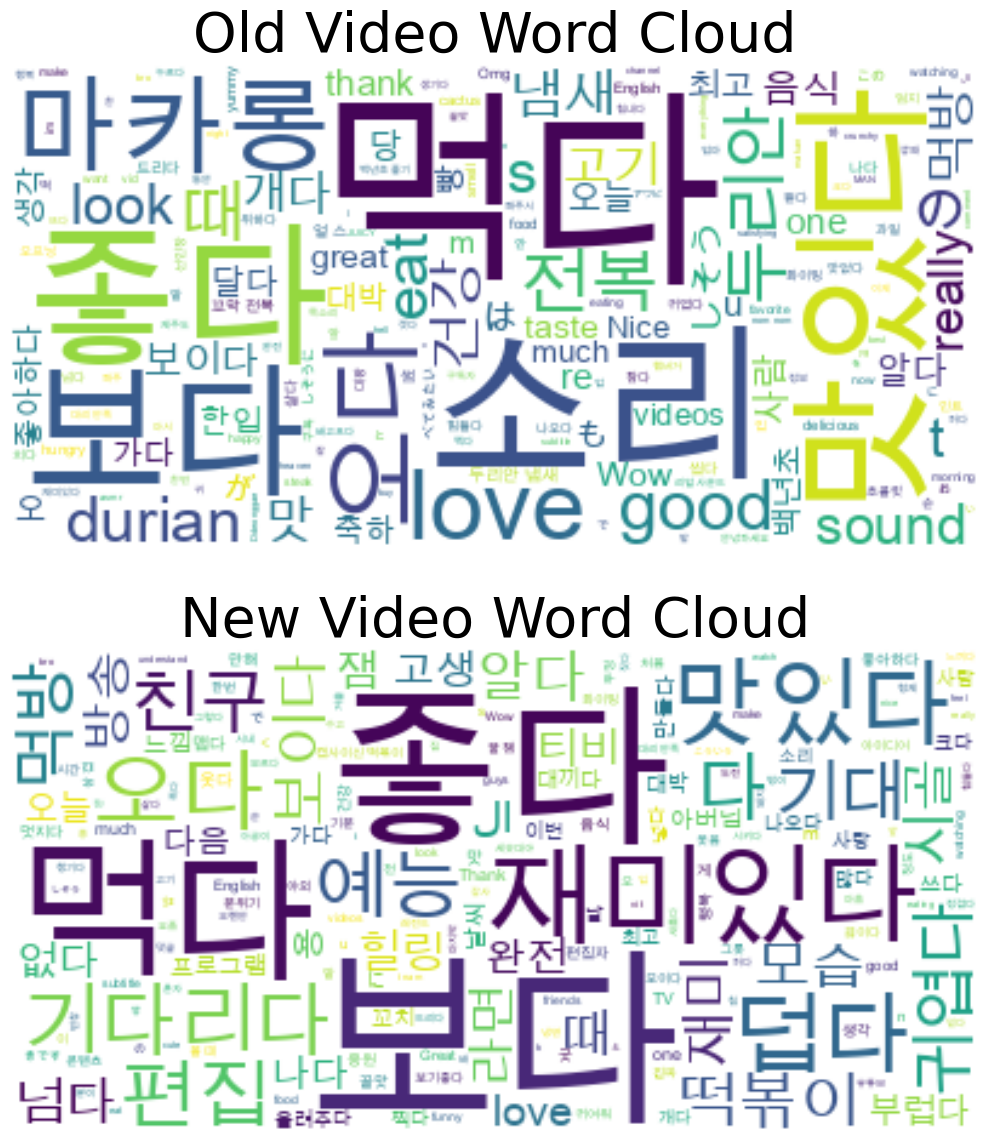

In [106]:
# Set WordCloud parameters:
# 1. max_words: Limit the visualization to the top 200 most frequent words
# 2. stopwords: Exclude common words (the, a, is)
# 3. font_path : Use font compatible with unicode
wc_settings = {
    "max_words": 200,
    "background_color": "white",
    "font_path": "/Library/Fonts/Arial Unicode.ttf",
    "stopwords": total_stopwords,
}

old_wordcloud = WordCloud(**wc_settings).generate(processed_old_text)
new_wordcloud = WordCloud(**wc_settings).generate(processed_new_text)


plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.imshow(old_wordcloud, interpolation="bilinear")
plt.title("Old Video Word Cloud", fontsize=40)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(new_wordcloud, interpolation="bilinear")
plt.title("New Video Word Cloud", fontsize=40)
plt.axis("off")

plt.tight_layout()
plt.show()

### Bar Chart

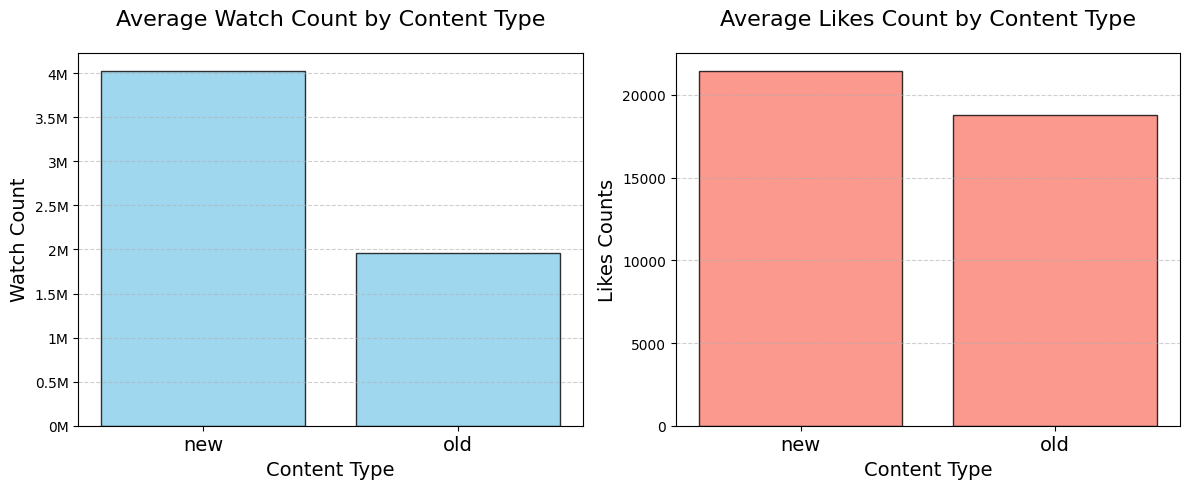

In [107]:
def millions_formatter(x, pos):
    return f"{x * 1e-6:g}M"


grouped_df = (
    df.groupby("content_type")[["video_watch_count", "video_like_count"]]
    .mean()
    .reset_index()
)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: Watch Count
ax1.bar(
    grouped_df["content_type"],
    grouped_df["video_watch_count"],
    color="skyblue",
    edgecolor="black",
    alpha=0.8,
)
ax1.set_title("Average Watch Count by Content Type", fontsize=16, pad=20)
ax1.set_xlabel("Content Type", fontsize=14)
ax1.set_ylabel("Watch Count", fontsize=14)
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax1.tick_params(axis="x", labelsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.6)

# Right: Like Count
ax2.bar(
    grouped_df["content_type"],
    grouped_df["video_like_count"],
    color="salmon",
    edgecolor="black",
    alpha=0.8,
)
ax2.set_title("Average Likes Count by Content Type", fontsize=16, pad=20)
ax2.set_xlabel("Content Type", fontsize=14)
ax2.set_ylabel("Likes Counts", fontsize=14)
ax2.tick_params(axis="x", labelsize=14)
ax2.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()